<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Earthquake_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("database.csv")
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [ ]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [ ]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157630542.0
1,1.863,127.352,80.0,5.8,-157465811.0
2,-20.579,-173.972,20.0,6.2,-157355642.0
3,-59.076,-23.557,15.0,5.8,-157093817.0
4,11.938,126.427,15.0,5.8,-157026430.0


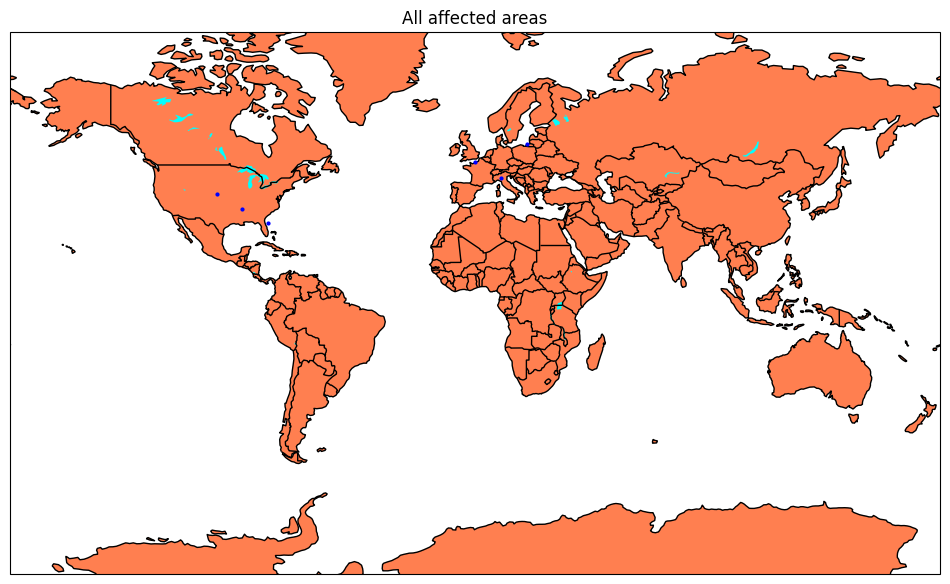

In [ ]:
# Install Cartopy
!pip install cartopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Sample data (replace with your actual dataset)
data = pd.DataFrame({
    'Longitude': [-100, -90, -80, 0, 10, 20],
    'Latitude': [40, 35, 30, 50, 45, 55]
})

# Create the plot
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.Miller())
ax.set_extent([-180, 180, -80, 80], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='coral')
ax.add_feature(cfeature.LAKES, facecolor='aqua')
ax.add_feature(cfeature.BORDERS)

# Plot data points
ax.plot(
    data["Longitude"], data["Latitude"],
    'o', markersize=2, color='blue',
    transform=ccrs.PlateCarree()
)

plt.title("All affected areas")
plt.show()

In [ ]:
# Assuming final_data is your dataset
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

# Correct import for train_test_split
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [ ]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

# Assuming create_model is defined elsewhere
model = KerasClassifier(model=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
data = pd.read_csv("database.csv")
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]

# Convert Date and Time to Timestamp
timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d + ' ' + t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']

# Convert Timestamp to float and drop missing values
final_data['Timestamp'] = final_data['Timestamp'].astype(float)
final_data = final_data.dropna()

# Prepare X and y for regression
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

# Scale features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define model
model = Sequential([
    Dense(16, activation='relu', input_shape=(3,)),
    Dense(16, activation='relu'),
    Dense(2, activation='linear')  # Regression output
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean squared error, mean absolute error

# Fit model
model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, MAE = {}".format(test_loss, test_mae))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


586/586 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 9808.7227 - mae: 36.0128 - val_loss: 7722.7046 - val_mae: 30.1582
Epoch 2/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6825.9780 - mae: 31.1581 - val_loss: 7354.1470 - val_mae: 36.0934
Epoch 3/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7231.0483 - mae: 35.5872 - val_loss: 7315.7104 - val_mae: 35.6455
Epoch 4/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7320.2969 - mae: 35.7679 - val_loss: 7295.8120 - val_mae: 35.1652
Epoch 5/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7351.0283 - mae: 35.4348 - val_loss: 7276.7603 - val_mae: 35.7255
Epoch 6/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7085.5312 - mae: 34.9005 - val_loss: 7262.2041 - val_mae: 35.5951
Epoch 7/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7137.9897 - mae: 35.4286 - val_loss: 7245.2344 - val_mae: 35.2745
Epoch 8/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7274.1738 - mae: 35.7438 - val_loss: 7236.6606 - val_mae: 34.7523
Epo